<a href="https://colab.research.google.com/github/ras-internship/colabs/blob/Dimar/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%BE%D1%82%D0%B1%D1%80%D0%B0%D0%BA%D0%BE%D0%B2%D0%BA%D0%B0_%D0%B1%D0%B0%D0%B7%D1%8B_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B2%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D1%85_%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install pandas openpyxl
!cp drive/MyDrive/Стажировка_РАН/Сводная_База_МЭП_DIMAR.xlsx ./

In [28]:
import pandas as pd

# Задаем имена файлов и листов
file_path = 'Сводная_База_МЭП_DIMAR.xlsx'
file_path_out = 'Обраб_Сводная_База_МЭП_DIMAR.xlsx'
sheet_Base = 'База'
sheet_DicPar = 'Словарь_параметров'
NameData_row = 'Т'

# Читаем данные с листов
df_base = pd.read_excel(file_path, sheet_name=sheet_Base, index_col=0)
df_dic = pd.read_excel(file_path, sheet_name=sheet_DicPar)

# Устанавливаем диапазон дат для проверки
min_date = df_base.index.min()
max_date = min_date + pd.DateOffset(years=1)
#===============================================================================
# Создаем словарь для хранения столбцов и их текстовых описаний
columns_with_description = {}
# Получаем описание для каждого столбца
for col in df_base.columns:
    description = df_dic.loc[df_dic['код параметра'] == col, 'текстовое описание'].values[0]
    if description in columns_with_description:
        columns_with_description[description].append(col)
    else:
        columns_with_description[description] = [col]
#===============================================================================
# Выводим столбцы с одинаковым текстовым описанием
print("Столбцы с одинаковым текстовым описанием:")
for desc, columns in columns_with_description.items():
    if len(columns) > 1:
        print(f"{desc}: {', '.join(columns)}")

# Находим столбцы с недостаточным количеством чисел
columns_to_remove = []
date_ranges = {}
for col in df_base.columns:
    count_of_numbers = df_base.loc[min_date:max_date, col].count()
    print(count_of_numbers)
    if count_of_numbers < 12:       
        columns_to_remove.append(col)
        min_data_date = df_base[col].dropna().index.min()
        max_data_date = df_base[col].dropna().index.max()
        date_ranges[col] = (min_data_date, max_data_date)

# Удаляем столбцы с недостаточным количеством чисел
df_base.drop(columns_to_remove, axis=1, inplace=True)
print("="*40)
#===============================================================================
# Создаем словарь для хранения столбцов и их текстовых описаний
columns_with_description = {}

# Получаем описание для каждого столбца
for col in df_base.columns:
    description = df_dic.loc[df_dic['код параметра'] == col, 'текстовое описание'].values[0]
    columns_with_description[col] = description

# Находим столбцы с одинаковыми значениями по всему столбцу
equal_columns = []
columns_to_drop = []
for col1 in df_base.columns:
    for col2 in df_base.columns:
        if col1 != col2 and (col2, col1) not in equal_columns:
            if df_base[col1].equals(df_base[col2]):
                equal_columns.append((col1, col2))
                columns_to_drop.append(col2)

# Выводим коды и описания столбцов с одинаковыми значениями по всему столбцу
print("Столбцы с одинаковыми значениями по всему столбцу:")
for col1, col2 in equal_columns:
    desc1 = columns_with_description[col1]
    desc2 = columns_with_description[col2]
    print(f"{col1}: {desc1},\n {col2}: {desc2}")
    print("-"*40)
print("="*40)
# Удаляем второй столбец из пары столбцов с одинаковыми значениями
df_base = df_base.drop(columns=columns_to_drop)
#===============================================================================
# Задаем диапазон, котором будем усекать базу данных 
date_beg = '1999-01-01'
date_end = '2022-12-31'

# Фильтруем базу данных по заданному диапазону дат
df_filtered = df_base.loc[date_beg:date_end]

# Находим столбцы, содержащие пустые значения
columns_with_nan = df_filtered.columns[df_filtered.isna().any()].tolist()
# Удаляем найденные столбцы
df_base = df_base.drop(columns=columns_with_nan)

# Выводим удаленные столбцы с их текстовыми описаниями
print("Удалены следующие столбцы:")
for col in columns_with_nan:
    description = df_dic.loc[df_dic['код параметра'] == col, 'текстовое описание'].values[0]
    print(f"{col}: {description}")
#===============================================================================
# Сохраняем измененный файл
with pd.ExcelWriter(file_path_out, engine='openpyxl') as writer:
    df_base.to_excel(writer, sheet_name=sheet_Base)
    df_dic.to_excel(writer, sheet_name=sheet_DicPar)

# Создаем словарь для хранения удаленных столбцов с их описанием
removed_columns_with_description = {}

# Ищем описание для каждого удаленного столбца
for col in columns_to_remove:
    description = df_dic.loc[df_dic['код параметра'] == col, 'текстовое описание'].values[0]
    removed_columns_with_description[col] = description

#Сортируем удаленные столбцы по начальной дате
# Сортируем удаленные столбцы по начальной дате
sorted_columns = sorted(columns_to_remove, key=lambda x: (date_ranges[x][0] if pd.notnull(date_ranges[x][0]) else pd.Timestamp.min))

# Выводим названия и описания удаленных столбцов с диапазонами дат
print("Удалены следующие столбцы:")
for col in sorted_columns:
    desc = removed_columns_with_description[col]
    date_range = date_ranges[col]
    print(f"{col}:({date_range[0]} - {date_range[1]})интервал :{date_range[1] - date_range[0]}:{desc} ")

print("="*40)
# Выполняем анализ содержания оставшейся базы
summary = df_base.describe().T

# Добавляем текстовые описания столбцов
summary['текстовое описание'] = summary.index.map(columns_with_description)

# Выводим статистическую информацию
display(summary)


Столбцы с одинаковым текстовым описанием:
1.3. Индекс производства продукции сельского хозяйства  % к соответствующему периоду предыдущего года : X1, Z64
Индекс обрабатывающего производства по ОКВЭД2, 2002.1=100: Z69, Z71
Индекс обрабатывающего производства по ОКВЭД2, с поправкой на сезонность, 2002.1(факт)=100: Z70, Z72
13
13
13
13
13
13
13
13
13
0
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
0
13
0
13
13
13
0
13
13
13
13
13
13
13
13
0
13
13
13
13
13
0
0
0
0
13
13
13
13
13
13
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
13
0
0
0
0
0
0
0
0
0
13
13
13
13
13
0
0
0
0
0
0
0
0
13
0
0
0
0
0
0
0
0
0
13
0
13
13
13
13
13
13
13
13
13
13
13
0
0
13
13
0
0
0
0
Столбцы с одинаковыми значениями по всему столбцу:
X1: 1.3. Индекс производства продукции сельского хозяйства  % к соответствующему периоду предыдущего года ,
 Z64: 1.3. Индекс производства продукции сельского хозяйства  % к соответствующему периоду предыдущего года 
----------------------------------------
X5: 1.5. Грузооборот транспо

,count,mean,std,min,25%,50%,75%,max,текстовое описание
Y1,288.0,4886.054826,3480.368761,300.333333,1619.083333,4378.966590,7431.612139,12927.666667,"Объем ВВП, млрд рублей"
Y2,288.0,0.851528,0.923687,-0.540000,0.360000,0.630000,1.092500,8.380000,"Инфляция, индекс %"
X1,290.0,102.845276,6.741371,74.300000,100.300000,102.500000,104.600000,139.600000,1.3. Индекс производства продукции сельского х...
X2,288.0,920.486111,344.170993,395.000000,594.250000,931.500000,1168.250000,1817.000000,1.4.1 Производство продуктов животноводства в ...
X3,288.0,2632.049093,622.913432,1565.000000,2065.000000,2559.500000,3126.750000,4111.000000,1.4.2 Производство продуктов животноводства в ...
X4,288.0,3354.378472,422.611764,2299.000000,3068.000000,3403.000000,3692.750000,4175.000000,1.4.3 Производство продуктов животноводства в ...
X5,288.0,403.138889,55.000338,258.800000,377.500000,411.300000,441.325000,500.300000,"1.5. Грузооборот транспорта, включая коммерчес..."
X6,288.0,884.707639,757.922458,28.500000,254.125000,741.600000,1252.433333,3749.600000,"1.6.Инвестиции в основной капитал, млрд рублей"
X7,288.0,420.440904,332.391295,14.100000,119.775000,375.800000,609.746952,1827.900000,1.7. Объем работ_Строительства_в фактических ц...
X9,288.0,1250.174859,889.669298,101.700000,500.715000,1126.026000,1739.246220,4313.500270,"1.9.1 экспорт товаров – всего, млрд руб."


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 1999-01-01 to NaT
Data columns (total 60 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y1      288 non-null    float64
 1   Y2      288 non-null    float64
 2   X1      290 non-null    float64
 3   X2      288 non-null    float64
 4   X3      288 non-null    float64
 5   X4      288 non-null    float64
 6   X5      288 non-null    float64
 7   X6      288 non-null    float64
 8   X7      288 non-null    float64
 9   X9      288 non-null    float64
 10  X10     288 non-null    float64
 11  X11     288 non-null    float64
 12  X12     288 non-null    float64
 13  X13     288 non-null    float64
 14  X14     288 non-null    float64
 15  X15     288 non-null    float64
 16  X16     289 non-null    float64
 17  X17     288 non-null    float64
 18  X18     288 non-null    float64
 19  X19     288 non-null    float64
 20  X20     288 non-null    float64
 21  X21     288 non-null    flo

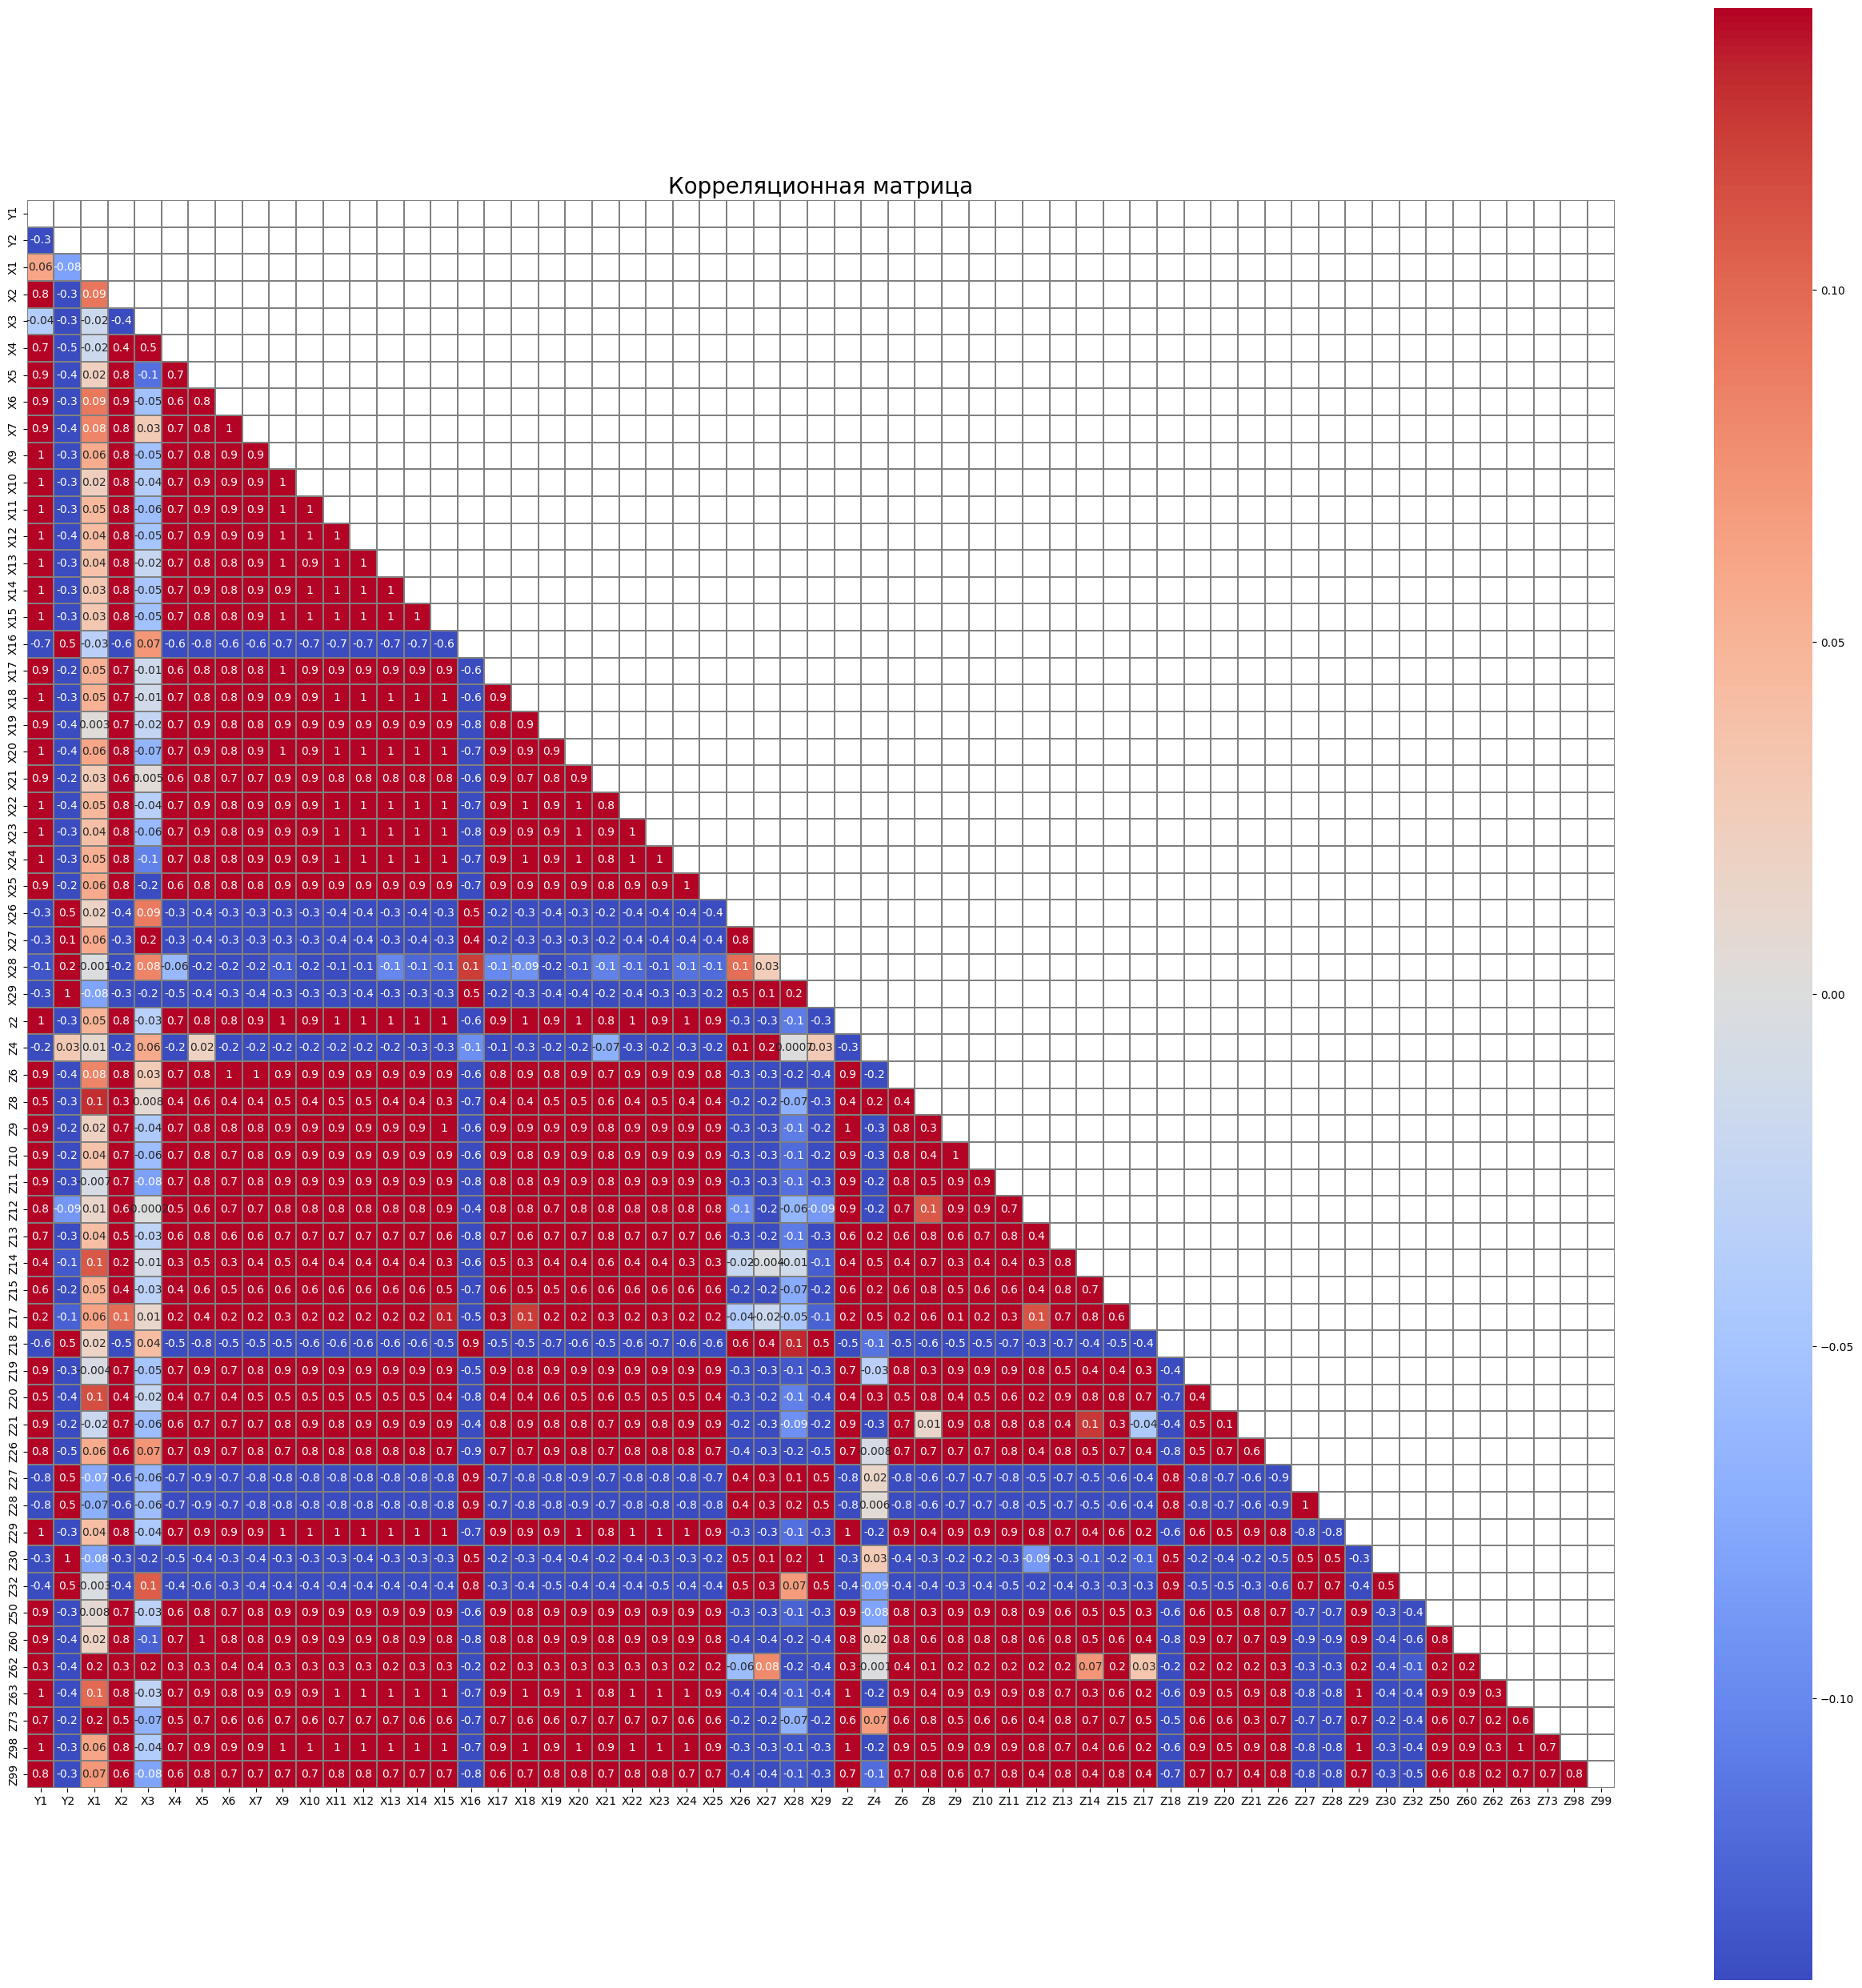

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
df_base.info()
# установка первого столбца в качестве индекса
#df_base.set_index(df_base.columns[0], inplace=True)

# создание переменной с верхним треугольником корреляционной матрицы
mask_1 = np.triu(df_base.iloc[:, :].corr())
plt.figure(figsize=(32,32))
sb.heatmap(df_base.iloc[:,:].corr(),cmap='coolwarm',vmin=-0.14,vmax=0.14,center=0,square=True, annot=True, fmt='.1g', linewidths=0.05, linecolor='gray',mask=mask_1)
plt.title("Корреляционная матрица", fontsize=20)
plt.show()

In [54]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Создаем объект subplots с несколькими графиками
fig = make_subplots(rows=len(df_base.columns), cols=1, shared_xaxes=True, subplot_titles=list(df_base.columns))

# Добавляем графики для каждого столбца
for idx, col in enumerate(df_base.columns, start=1):
    description = columns_with_description[col]
    description = df_dic.loc[df_dic['код параметра'] == col, 'текстовое описание'].values[0]
    fig.add_trace(go.Scatter(x=df_base.index, y=df_base[col], mode='lines', name=description), row=idx, col=1)

# Обновляем заголовки графиков и оси
fig.update_layout(height=len(df_base.columns) * 300, width=2000, title_text="Интерактивный график всех параметров от времени")
fig.update_xaxes(title_text='Дата', tickformat='%Y-%m-%d')
fig.update_yaxes(title_text='Значение')

# Отображаем график
fig.show()
